In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

In [349]:
df = pd.read_csv('Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [350]:
df.shape

(7043, 21)

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [352]:
df.drop(['customerID'], axis = 1, inplace=True)

In [353]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [354]:
df.dropna(inplace=True)

In [355]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

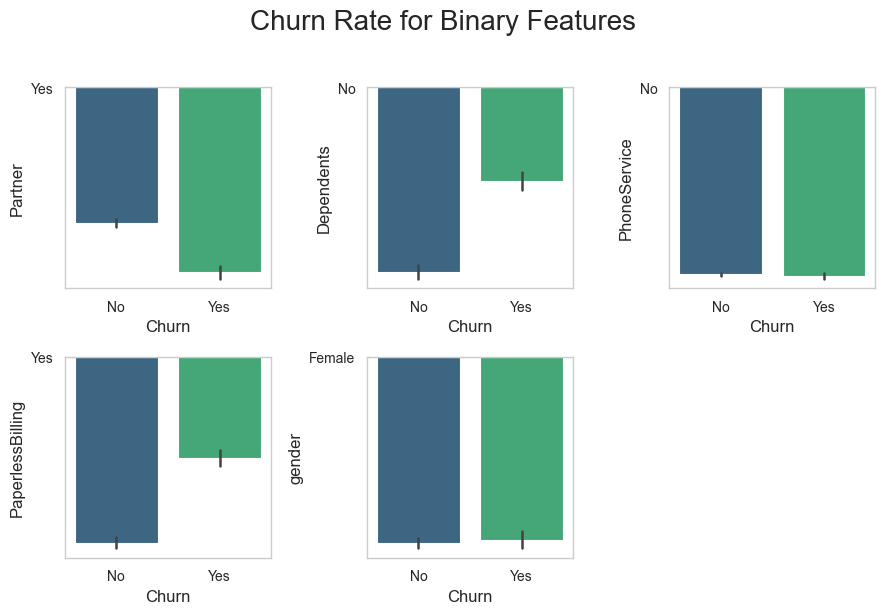

In [358]:
binary_cols = ['Partner','Dependents','PhoneService','PaperlessBilling', 'gender']

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)

fig, axes = plt.subplots(2, 3, figsize=(9, 6))
fig.suptitle("Churn Rate for Binary Features", fontsize=20, y=1.02)

axes = axes.flatten()

for i, col in enumerate(binary_cols):
    sns.barplot(data=df, x='Churn', y=col, ax=axes[i], palette='viridis', hue='Churn')
    axes[i].set_xlabel('Churn', fontsize=12)
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].tick_params(axis='both', which='major', labelsize=10)

fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

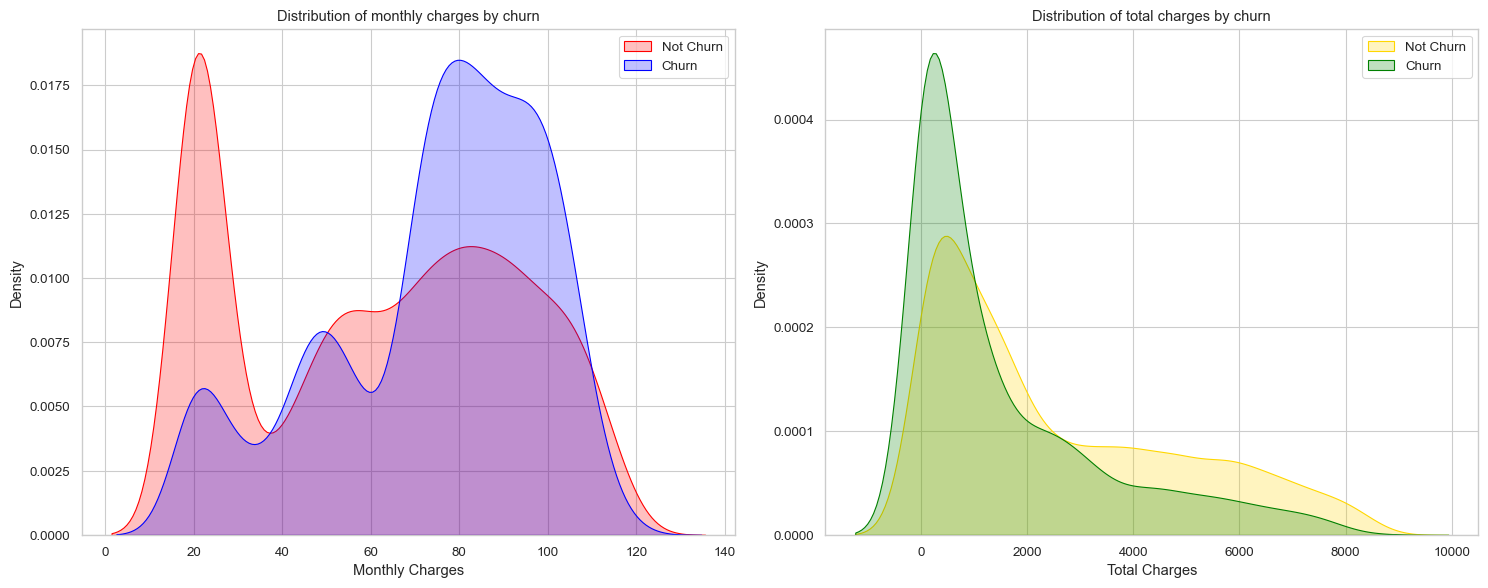

In [359]:
sns.set_context("paper", font_scale=1.1)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.kdeplot(data=df[df["Churn"] == 'No'], x="MonthlyCharges", color="Red", fill=True, ax=axes[0])
sns.kdeplot(data=df[df["Churn"] == 'Yes'], x="MonthlyCharges", color="Blue", fill=True, ax=axes[0])

axes[0].legend(["Not Churn", "Churn"], loc='upper right')
axes[0].set_ylabel('Density')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_title('Distribution of monthly charges by churn')

sns.kdeplot(data=df[df["Churn"] == 'No'], x="TotalCharges", color="Gold", fill=True, ax=axes[1])
sns.kdeplot(data=df[df["Churn"] == 'Yes'], x="TotalCharges", color="Green", fill=True, ax=axes[1])

axes[1].legend(["Not Churn", "Churn"], loc='upper right')
axes[1].set_ylabel('Density')
axes[1].set_xlabel('Total Charges')
axes[1].set_title('Distribution of total charges by churn')

plt.tight_layout()
plt.show()

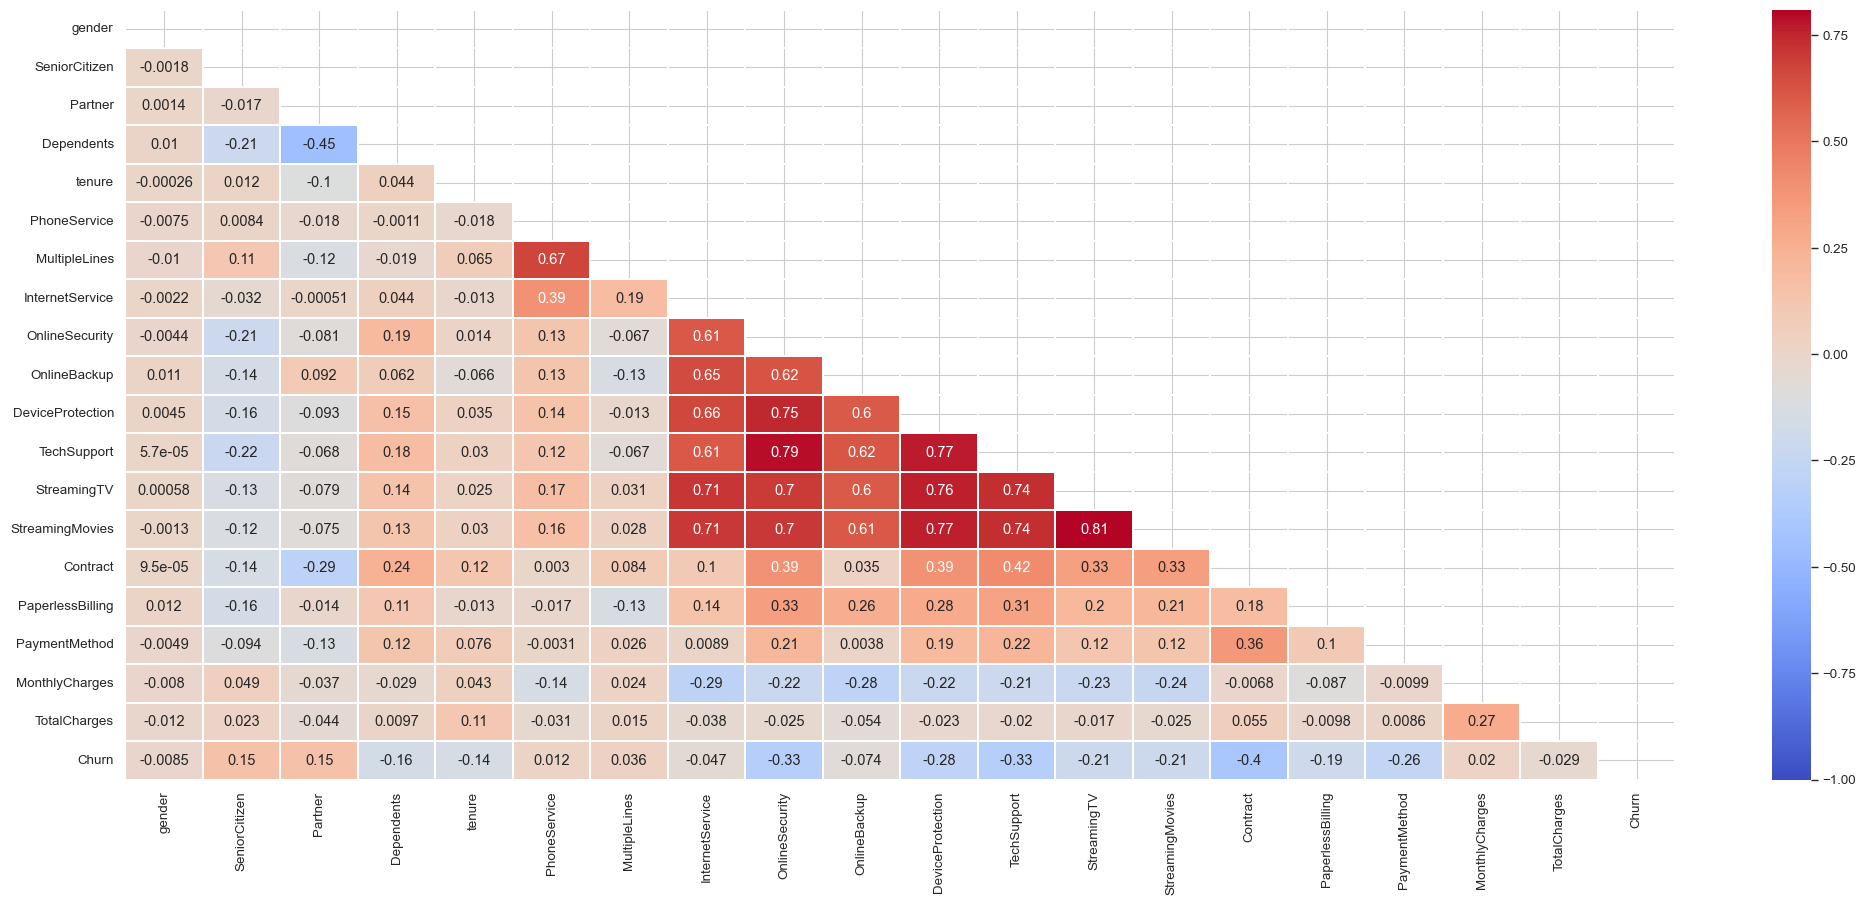

In [360]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, mask=mask)

In [361]:
df.drop(columns=['gender', 'PhoneService'], axis=1, inplace=True)

In [362]:
encoder = LabelEncoder()

def encode(x):
    if x.dtype == 'object':
        x = encoder.fit_transform(x)
    return x

df = df.apply(lambda x: encode(x))

In [363]:
ohe_cols = ['PaymentMethod', 'Contract', 'InternetService']

df = pd.get_dummies(df, columns=ohe_cols, dtype=np.float32, drop_first=True)

<Axes: >

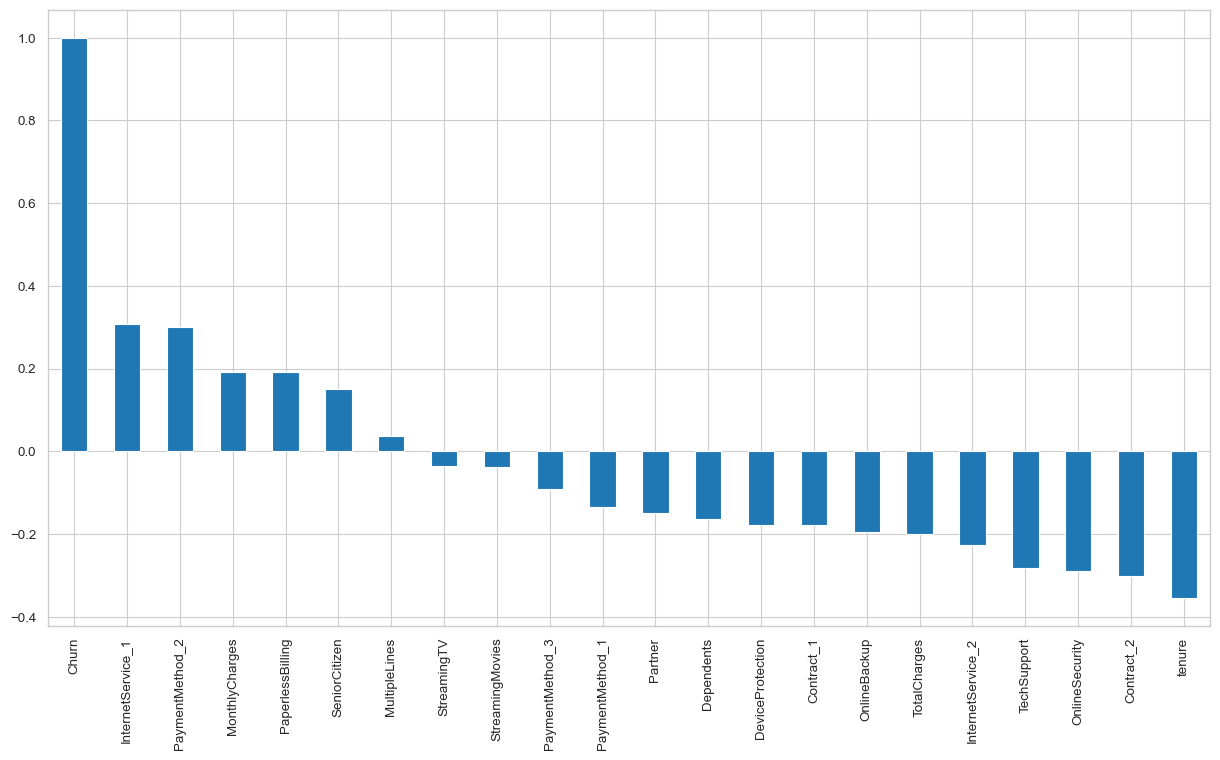

In [364]:
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [365]:
X = df.drop('Churn', axis=1)
y = df['Churn']

------------------------------------------------------------------

In [ ]:
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [ ]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()

X[num_cols] = scaler.fit_transform(X[num_cols])

In [370]:
# Save the encoded data

pd.DataFrame.to_csv(X, 'X_preprocessed.csv', index=None)
pd.DataFrame.to_csv(y, 'y_preprocessed.csv', index=None)

In [371]:
X = pd.read_csv('X_preprocessed.csv')
y = pd.read_csv('y_preprocessed.csv').values

### Grid search

In [372]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40, stratify=y)

pipeline = Pipeline([
    ('lda', LDA(n_components=1)),
    ('svc', SVC())
])

param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__gamma': ['scale', 'auto', 0.1, 1],
    'lda__solver': ['svd', 'eigen']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train.ravel())

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Test set accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best parameters: {'lda__solver': 'svd', 'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best cross-validation score: 0.7974384053485206
Test set accuracy: 0.8061611374407583

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1549
           1       0.67      0.53      0.59       561

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



### Most important Features

In [373]:
X2 = X.copy()
y2 = y.copy()

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.30, random_state=40, stratify=y2)

rfc = RandomForestClassifier(n_estimators=500, random_state=40)

rfc.fit(X_train, y_train.ravel())

important_indices = np.argsort(rfc.feature_importances_)[::-1]

list(X2.iloc[:, important_indices[:10]].columns)

['TotalCharges',
 'MonthlyCharges',
 'tenure',
 'TechSupport',
 'OnlineSecurity',
 'PaymentMethod_2',
 'InternetService_1',
 'Contract_2',
 'MultipleLines',
 'PaperlessBilling']

In [374]:
X2 = X.copy()
y2 = y.copy()

# Removed highly correlated features
best_features = [
                 'TotalCharges',
                 'MonthlyCharges',
                 'tenure',
                 'TechSupport',
                 'PaymentMethod_2',
                 'InternetService_1',
                 'Contract_2',
                 'MultipleLines',
                 'PaperlessBilling'
                ]

X2 = X2[best_features]

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=40, stratify=y2)
y_train = y_train.ravel()

pipeline_ada = Pipeline([
    ('ada', AdaBoostClassifier(n_estimators=25, random_state=40, algorithm='SAMME'))  
])

pipeline_xgb = Pipeline([
    ('xgb', XGBClassifier(n_estimators=9, learning_rate=0.3,random_state=40, objective='binary:logistic'))  
])

pipeline_lr = Pipeline([
    ('pca', PCA(n_components=9)),
    ('lr', LogisticRegression(penalty='l2'))
])

pipeline_svc = Pipeline([
    ('pca', PCA(n_components=9)),
    ('svc', SVC(kernel='rbf', C=1, gamma='scale'))
])

pipeline_knn = Pipeline([
    ('knn', KNeighborsClassifier(n_neighbors=8))
])

pipeline_rfc = Pipeline([
    ('rfc', RandomForestClassifier(n_estimators=500, random_state=40, max_leaf_nodes=25)),
])

pipeline_dt = Pipeline([
    ('dt', DecisionTreeClassifier(random_state=42, max_depth=8, max_leaf_nodes=25))
])

pipeline_ada.fit(X_train, y_train)
pipeline_xgb.fit(X_train, y_train)
pipeline_lr.fit(X_train, y_train)
pipeline_svc.fit(X_train, y_train)
pipeline_knn.fit(X_train, y_train)
pipeline_rfc.fit(X_train, y_train)
pipeline_dt.fit(X_train, y_train)

y_pred_ada = pipeline_ada.predict(X_test)
y_pred_xgb = pipeline_xgb.predict(X_test)
y_pred_lr = pipeline_lr.predict(X_test)
y_pred_svc = pipeline_svc.predict(X_test)
y_pred_knn = pipeline_knn.predict(X_test)
y_pred_rfc = pipeline_rfc.predict(X_test)
y_pred_dt = pipeline_dt.predict(X_test)

print("ADA accuracy:", accuracy_score(y_test, y_pred_ada))
print("XGB accuracy:", accuracy_score(y_test, y_pred_xgb))
print("LR accuracy:", accuracy_score(y_test, y_pred_lr))
print("SVC accuracy:", accuracy_score(y_test, y_pred_svc))
print("KNN accuracy:", accuracy_score(y_test, y_pred_knn))
print("RFC accuracy:", accuracy_score(y_test, y_pred_rfc))
print("DT accuracy:", accuracy_score(y_test, y_pred_dt))

ADA accuracy: 0.8052132701421801
XGB accuracy: 0.8009478672985783
LR accuracy: 0.8052132701421801
SVC accuracy: 0.8056872037914692
KNN accuracy: 0.7943127962085308
RFC accuracy: 0.8052132701421801
DT accuracy: 0.8004739336492891


In [375]:
voting_clf = VotingClassifier(
    estimators=[
        ('ada', pipeline_ada),
        ('lr', pipeline_lr),
        ('rfc', pipeline_rfc),
    ],
    voting='hard'
)

voting_clf.fit(X_train, y_train)

cv_scores = cross_val_score(voting_clf, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

y_pred_voting = voting_clf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_voting))

Cross-validation scores: [0.78071066 0.81015228 0.79065041 0.79979675 0.80995935]
Mean CV score: 0.7983 (+/- 0.0227)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1549
           1       0.68      0.52      0.59       561

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



In [381]:
stacking_clf = StackingClassifier(
    estimators=[
        ('ada', pipeline_ada),
        ('xgb', pipeline_xgb),
        ('lr', pipeline_lr),
        ('svc', pipeline_svc),
        ('rfc', pipeline_rfc),
        ('dt', pipeline_dt)
    ]
)

stacking_clf.fit(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_stacking))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1549
           1       0.68      0.53      0.59       561

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110

